In [138]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv("./datas/ckd_dataset_no3.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


#### 데이터 확인 및 정제

In [140]:
df.shape

(400, 26)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [142]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


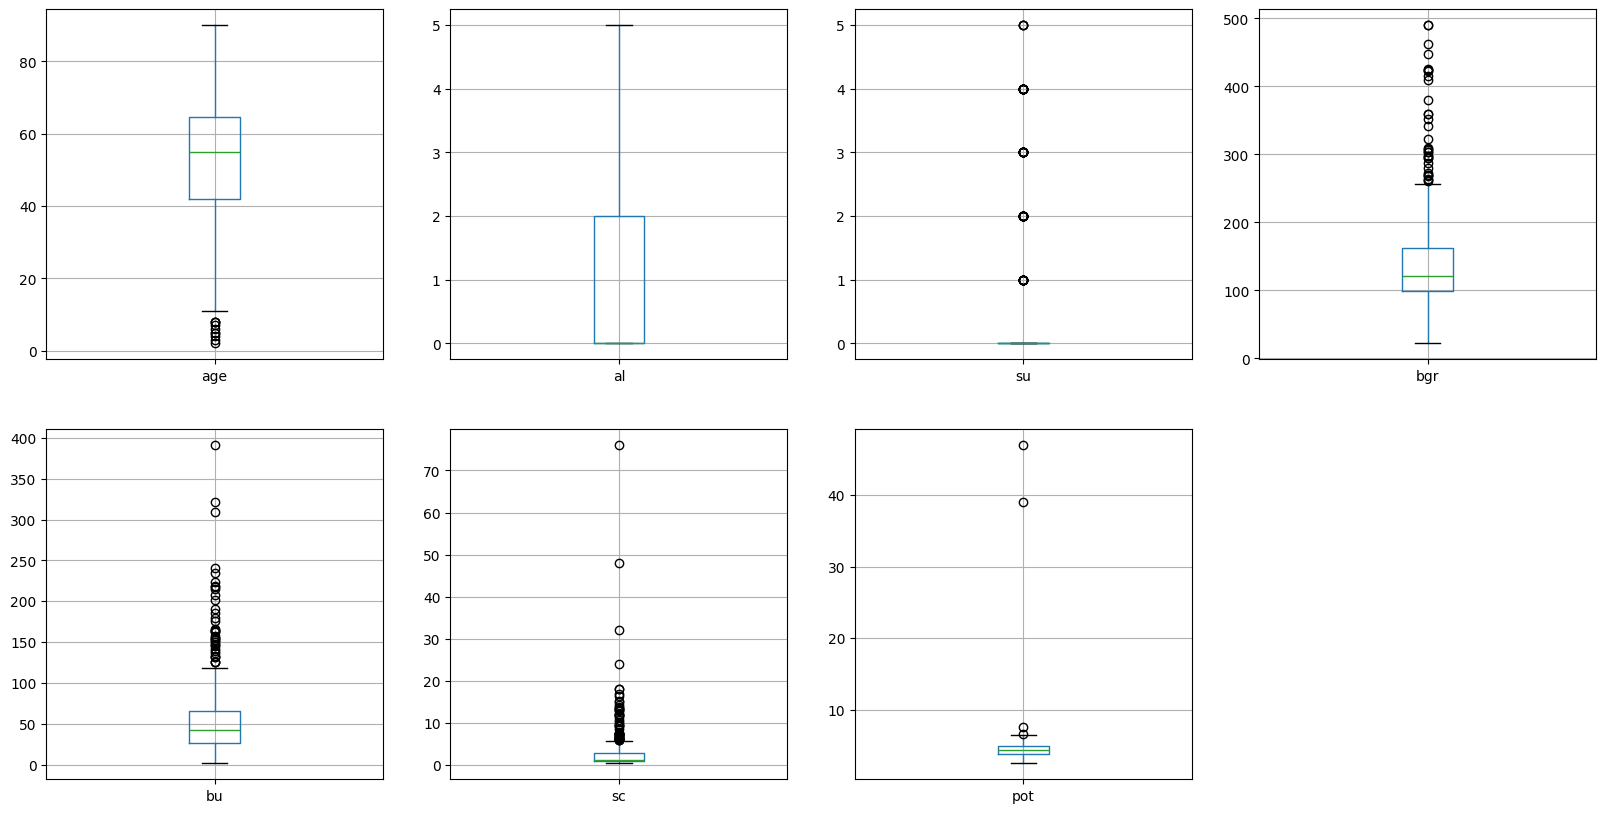

In [143]:
# 이상치 점검
# age min: 2
# al: 50%까지 모두 0, std 1.35
# su : 75%까지 모두 0
# bgr  max : 490
# bu max : 391
# sc max :76
# pot max : 47
import seaborn as sns

c_check = ["age", "al", "su", "bgr", "bu", "sc", "pot"]

plt.figure(figsize=(20,10))

for i, col in enumerate(c_check):
    ax = plt.subplot(2,4,i+1)
    df.boxplot(column=f'{col}')
plt.show()

In [144]:
# 20대 이하 0.5%
len(df[df["age"]<20])

21

In [145]:
# al의 수치 분포가 그래프상에 나오지 않아 개수 확인
len(df[df["al"]<4]) 

329

In [146]:
# describe에는 0으로 나왔으나 su의 값이 분포하고 있음
len(df[df["su"]<1]) # 290
len(df[df["su"]<2]) # 303
len(df[df["su"]<3]) # 321
len(df[df["su"]<4]) # 335
len(df[df["su"]<5]) 

348

In [147]:
# pot의 2개의 값은 확인 후 삭제
len(df[df["pot"]>35])

2

In [148]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [149]:
# 불필요한 컬럼 제거 
df.drop(['id'],axis=1, inplace=True)

#### 각 컬럼에 대한 값 점검

In [150]:
# 수치 데이터인데 object타입인 컬럼
v_check = ['pcv', 'wc', 'rc']

for i , col in enumerate(v_check):
    print(f'{col} : ',df[col].unique())

pcv :  ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
wc :  ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800'
 '9900' '5200' '5900' '9300' '9700' '5100' '6600']
rc :  ['5.2' nan '3.9' '4.6' '4.4' '5' '4.0' '3.7' '3.8' '3.

In [151]:
# type 변환
df['pcv'] = pd.to_numeric(df['pcv'],errors='coerce')
df['wc'] = pd.to_numeric(df['wc'],errors='coerce')
df['rc'] = pd.to_numeric(df['rc'],errors='coerce')

In [152]:
# 타입별 컬럼 분류 
obj_cols = []
num_cols = []

for i, col in enumerate(df):
    if df[col].dtype == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)

print(obj_cols, num_cols)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification'] ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


In [153]:
# obj 컬럼의 값 확인
for i , col in enumerate(obj_cols):
    print(f'{col} : ',df[col].unique())

rbc :  [nan 'normal' 'abnormal']
pc :  ['normal' 'abnormal' nan]
pcc :  ['notpresent' 'present' nan]
ba :  ['notpresent' 'present' nan]
htn :  ['yes' 'no' nan]
dm :  ['yes' 'no' ' yes' '\tno' '\tyes' nan]
cad :  ['no' 'yes' '\tno' nan]
appet :  ['good' 'poor' nan]
pe :  ['no' 'yes' nan]
ane :  ['no' 'yes' nan]
classification :  ['ckd' 'ckd\t' 'notckd']


In [154]:
# 오기된 데이터 수정
df['dm'].replace({' yes':'yes', '\tno':'no' , '\tyes':'yes'},inplace=True)
df['cad'].replace('\tno','no', inplace=True)
df['classification'].replace('ckd\t','ckd',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7272\524471112.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dm'].replace({' yes':'yes', '\tno':'no' , '\tyes':'yes'},inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7272\524471112.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [155]:
for i , col in enumerate(obj_cols):
    print(f'{col} : ',df[col].unique())

rbc :  [nan 'normal' 'abnormal']
pc :  ['normal' 'abnormal' nan]
pcc :  ['notpresent' 'present' nan]
ba :  ['notpresent' 'present' nan]
htn :  ['yes' 'no' nan]
dm :  ['yes' 'no' nan]
cad :  ['no' 'yes' nan]
appet :  ['good' 'poor' nan]
pe :  ['no' 'yes' nan]
ane :  ['no' 'yes' nan]
classification :  ['ckd' 'notckd']


In [156]:
# num 컬럼의 결측치 평균값 대체
df[num_cols].fillna(df[num_cols].mean())

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000


#### 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_7272\868740230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='rocket')
C:\Users\user\AppData\Local\Temp\ipykernel_7272\868740230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='rocket')
C:\Users\user\AppData\Local\Temp\ipykernel_7272\868740230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='rocket')
C:\Users\user\AppData\Local\Temp\ipykernel_7272\868740230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` i

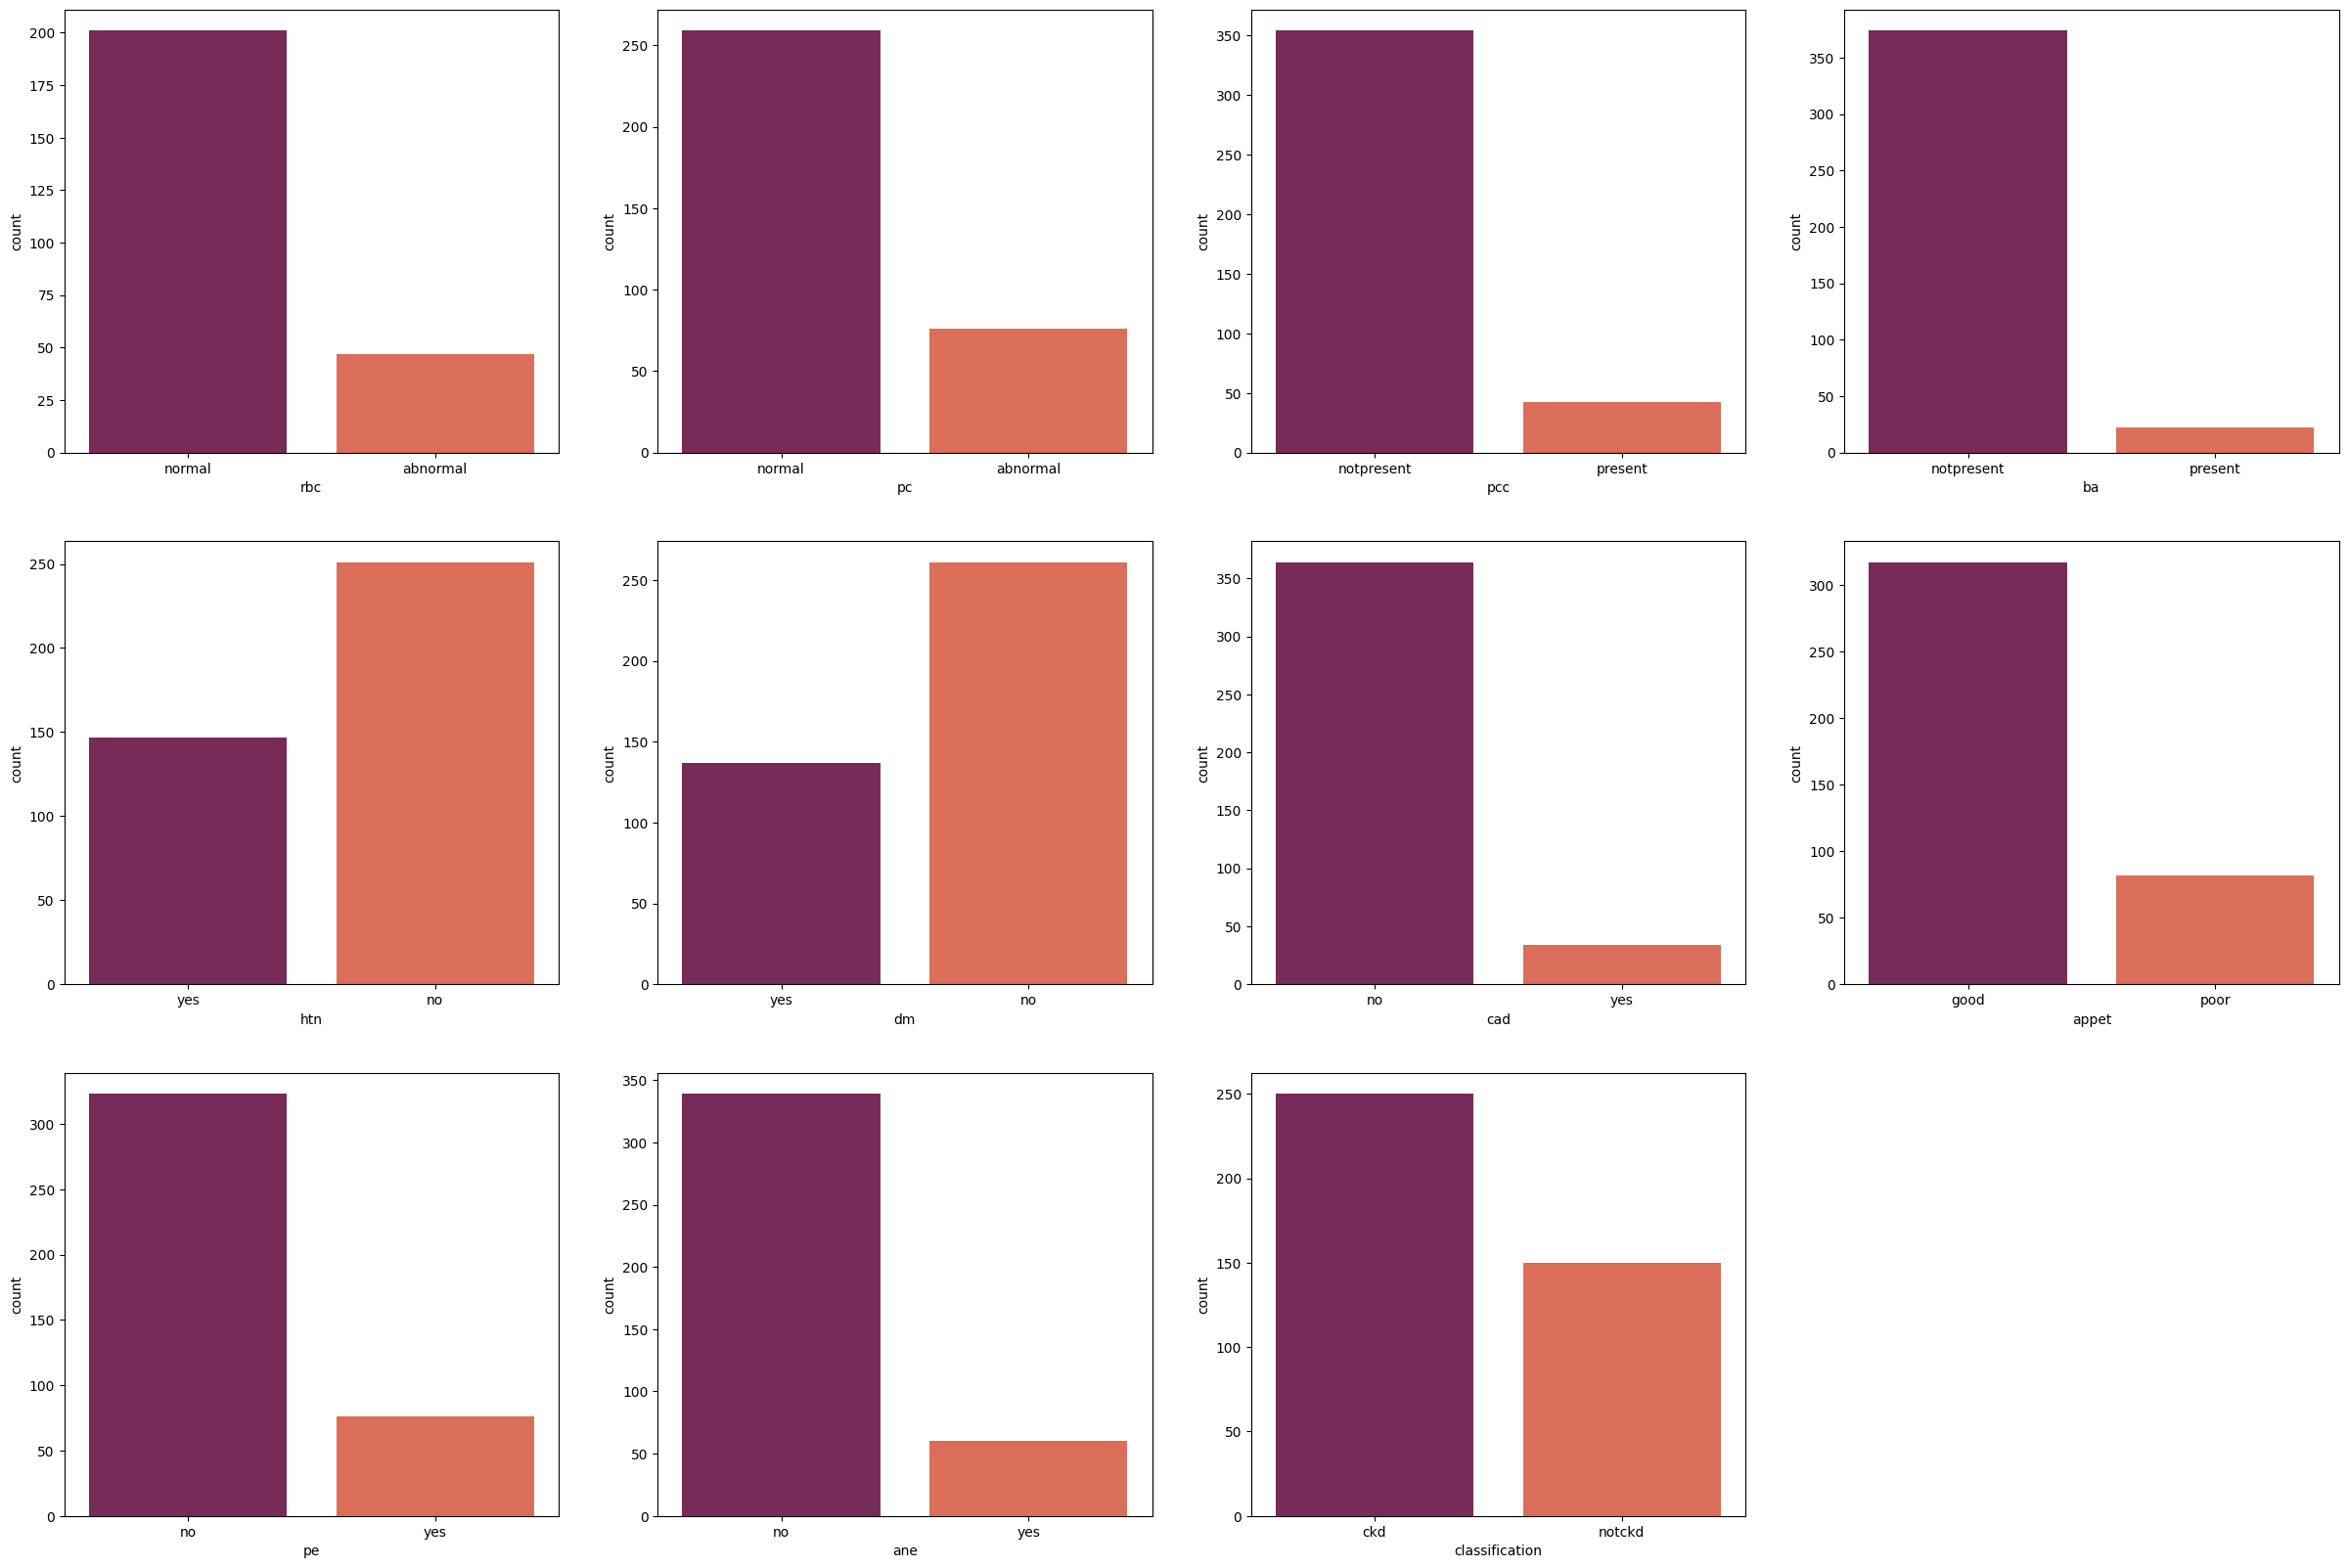

In [157]:
# 컬럼별 카운트
plt.figure(figsize=(30,20))

for i, col in enumerate(obj_cols):
    ax = plt.subplot(3,4,i+1)
    sns.countplot(x=df[col], palette='rocket')
    plt.xlabel(col)

plt.show()

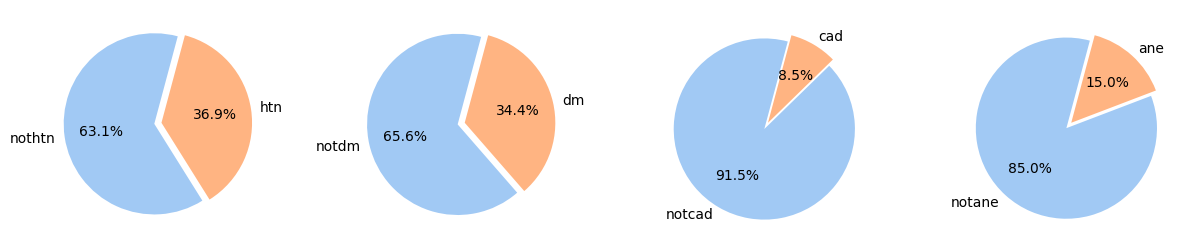

In [158]:
# 질병군별 백분률
disease = ['htn', 'dm', 'cad', 'ane']

plt.figure(figsize=(15,10))

for i, col in enumerate(disease):
    ax = plt.subplot(3,4,i+1)
    label = [f'not{col}', f'{col}']
    value = df[col].value_counts().values
    colors = sns.color_palette('pastel')
    explode = [0.08,0]
    plt.pie(value, labels=label, autopct='%.1f%%', counterclock=True, startangle=75, explode= explode, colors=colors)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7272\2895627817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\user\AppData\Local\Temp\ipykernel_7272\2895627817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\user\AppData\Local\Temp\ipykernel_7272\28956278

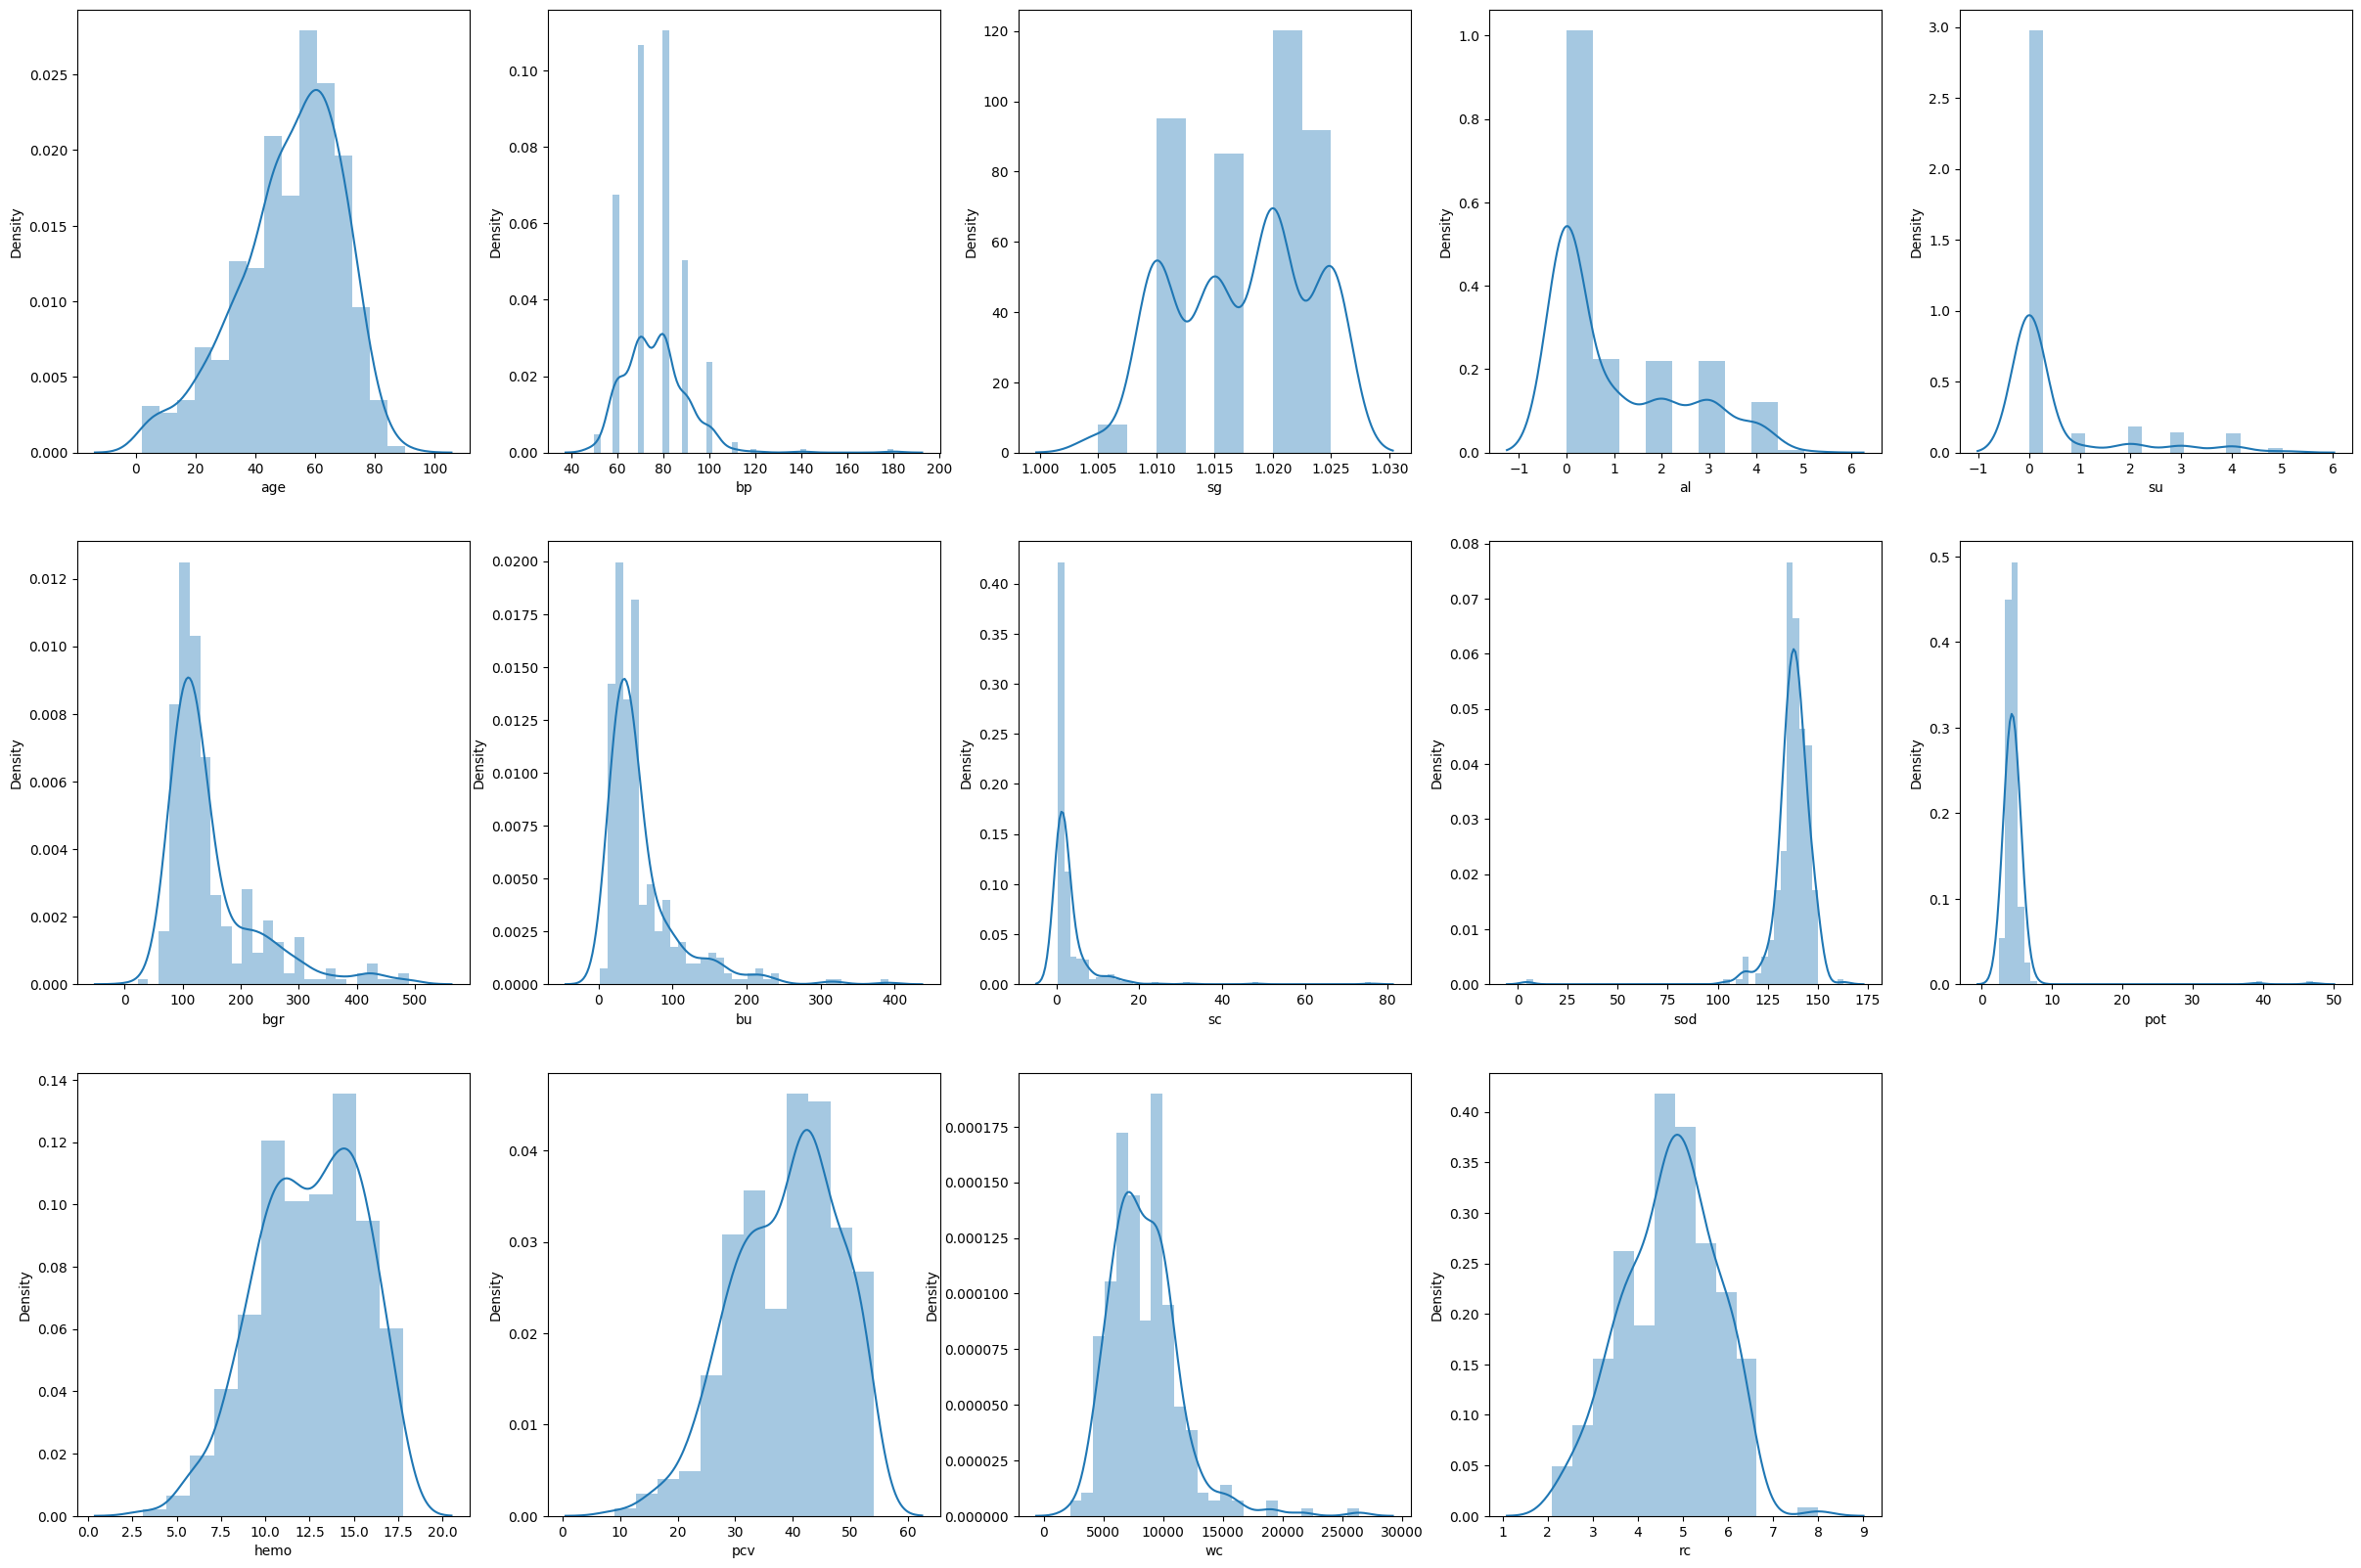

In [159]:
# 수치데이터의 컬럼별 분포
plt.figure(figsize=(30,20))

for i, col in enumerate(num_cols):
    ax = plt.subplot(3,5,i+1)
    sns.distplot(df[col])
    plt.xlabel(col)
plt.show()

## EDA

In [160]:
# CKD 여부에 따른 컬럼별 KDE 그래프

In [161]:
def kde_plot(col):
    f, ax = plt.subplots(1,1, figsize=(7,5))
    sns.kdeplot(df[df['classification']=='ckd'][col],label='CKD',  fill=True, ax = ax)
    sns.kdeplot(df[df['classification']=='notckd'][col], label='NotCKD', fill=True, ax = ax)
    plt.legend()
    plt.show()

In [162]:
# 수치 데이터에 대하여 전체 그래프 적용 -> al, su 컬럼에 대하여 notckd 데이터가 그래프 상에 나타나지 않아 확인
# for i, col in enumerate(num_cols):
#     kde_plot(col)

In [163]:
len(df[(df['al']==0) & (df['classification']=='notckd')]) # 145
len(df[(df['al']==0) & (df['classification']=='ckd')]) # 54

54

In [164]:
len(df[(df['su']==0) & (df['classification']=='notckd')]) # 145
len(df[(df['su']==0) & (df['classification']=='ckd')]) # 145

145

In [165]:
# su와 al컬럼을 제외
df.drop(['al','su'],axis=1,inplace=True)

In [166]:
# 타입별 컬럼 재분류 
obj_cols = []
num_cols = []

for i, col in enumerate(df):
    if df[col].dtype == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)

print(obj_cols, num_cols)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification'] ['age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


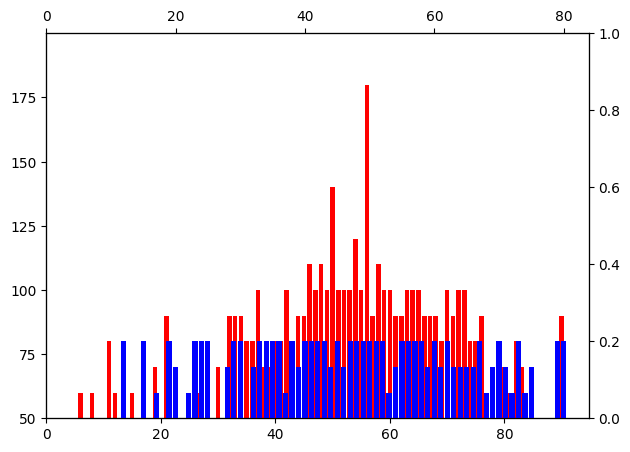

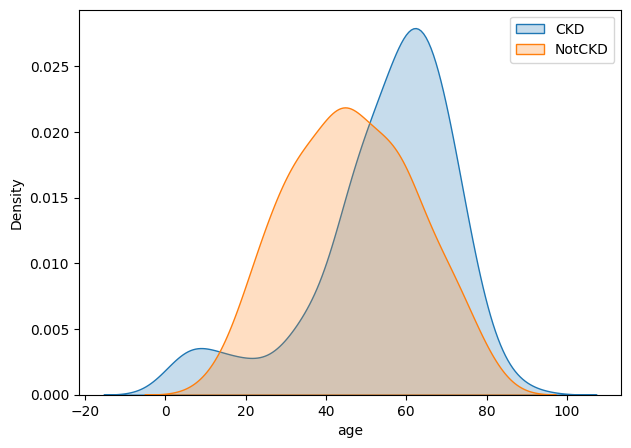

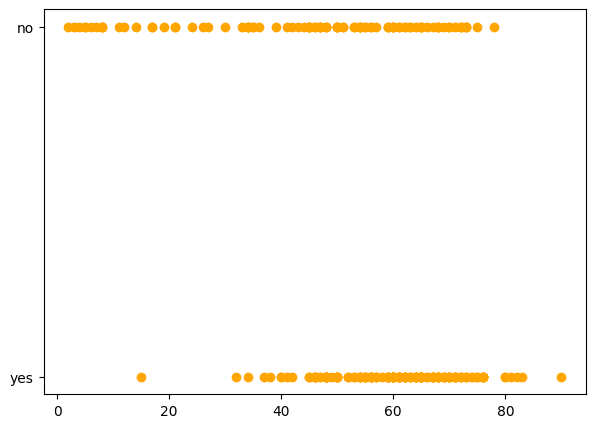

In [167]:
# CKD 여부에 따른 연령별 BP, HTN

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.bar(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['bp'],color='red')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([50,75,100,125,150,175])
ax1.set_ylim(50,200)

ax2 = ax1.twinx()
ax2 = ax1.twiny()
ax2.bar(df[df['classification']=='notckd']['age'],df[df['classification']=='notckd']['bp'],color='blue')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([50,75,100,125,150,175])
ax2.set_ylim(50,200)

kde_plot('age')

plt.figure(figsize=(7,5))
plt.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['htn'],color='orange')


In [168]:
df.columns

Index(['age', 'bp', 'sg', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod',
       'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')

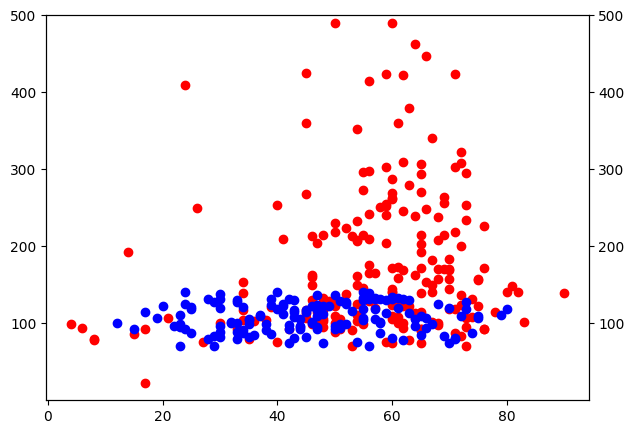

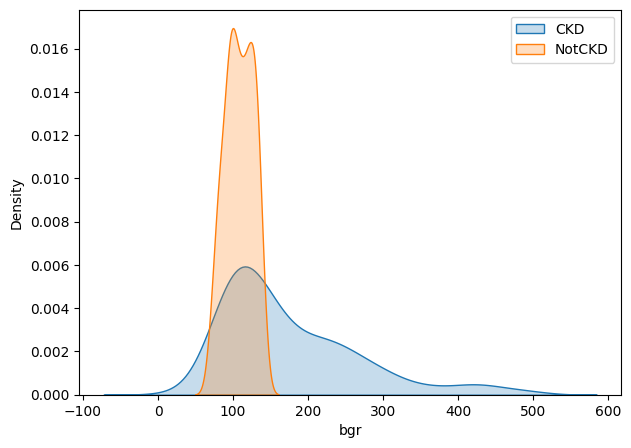

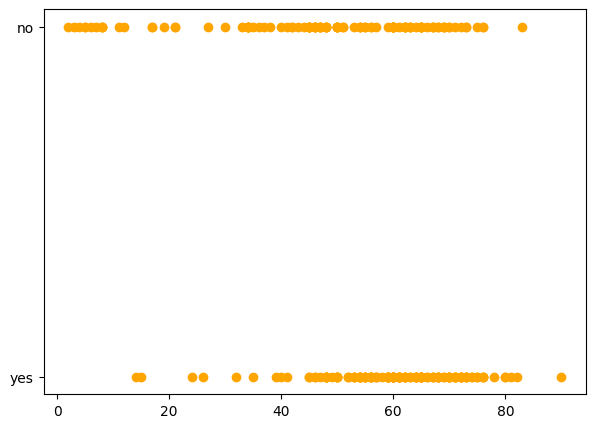

In [169]:
# CKD 여부에 따른 연령별 bgr(Blood Glucose Random), DM

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['bgr'],color='red')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([100,200,300,400,500])
ax1.set_ylim(0,500)

ax2 = ax1.twinx()
ax2.scatter(df[df['classification']=='notckd']['age'],df[df['classification']=='notckd']['bgr'],color='blue')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([100,200,300,400,500])
ax2.set_ylim(0,500)

kde_plot('bgr')

plt.figure(figsize=(7,5))
plt.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['dm'],color='orange')

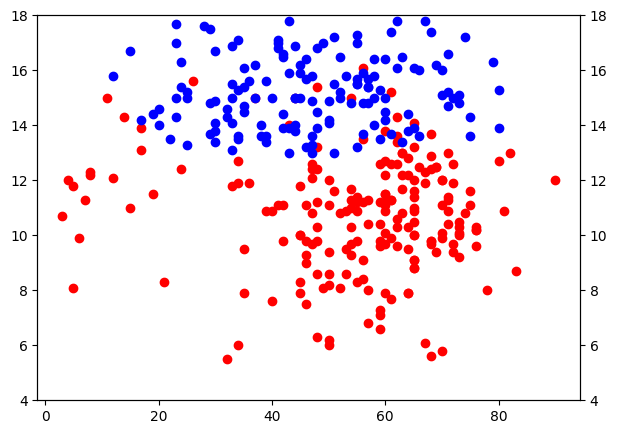

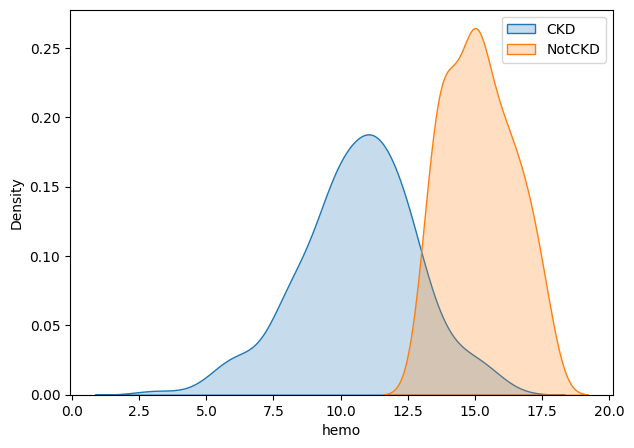

In [170]:
# CKD 여부에 따른 연령별 hemoblobin

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['hemo'],color='red')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([4,6,8,10,12,14,16,18])
ax1.set_ylim(4,18)

ax2 = ax1.twinx()
ax2.scatter(df[df['classification']=='notckd']['age'],df[df['classification']=='notckd']['hemo'],color='blue')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([4,6,8,10,12,14,16,18])
ax2.set_ylim(4,18)

kde_plot('hemo')

In [171]:
df['sod'] = df['sod'].fillna(df['sod'].mean())

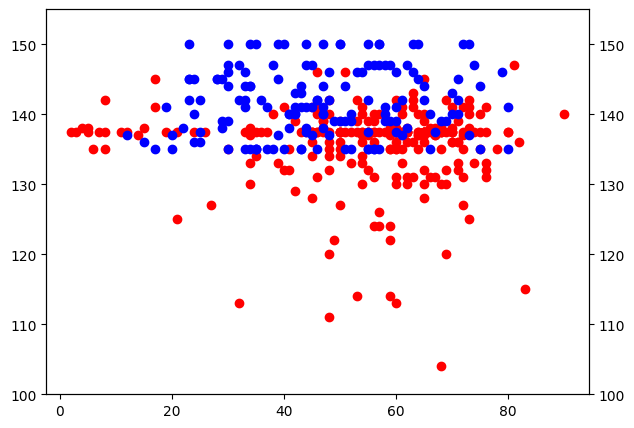

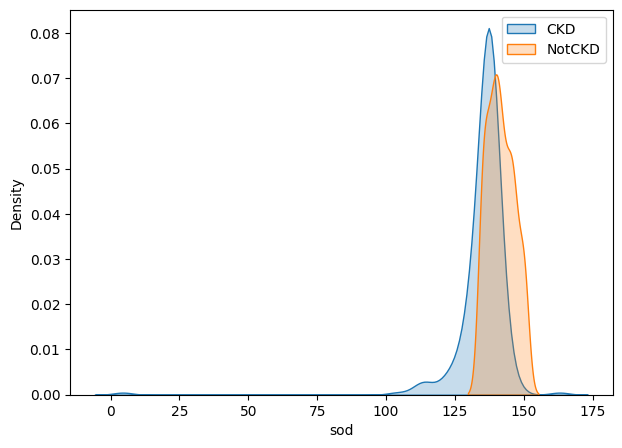

<Axes: xlabel='pe', ylabel='count'>

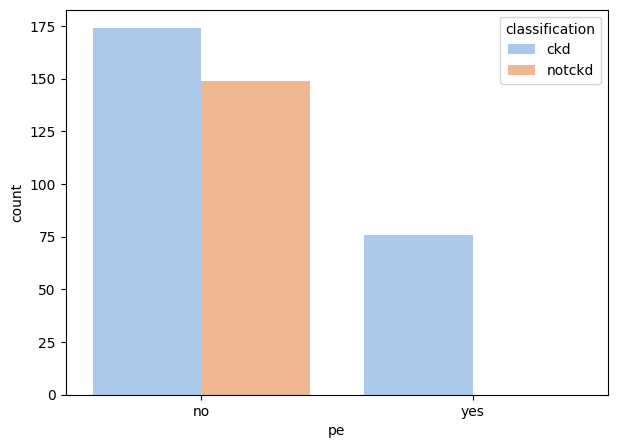

In [213]:
# CKD 여부에 따른 연령별 sod(Sodium), pe(Pedal Edema - datasets 컬럼설명참조)

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['sod'],color='red')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([100,110,120,130,140,150,160])
ax1.set_ylim(100,155)

ax2 = ax1.twinx()
ax2.scatter(df[df['classification']=='notckd']['age'],df[df['classification']=='notckd']['sod'],color='blue')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([100,110,120,130,140,150,160])
ax2.set_ylim(100,155)

kde_plot('sod')

plt.figure(figsize=(7,5))
sns.countplot(x=df['pe'], hue=df['classification'], palette='pastel')


In [173]:
df_fill = df[num_cols].fillna(df[num_cols].mean())
df_fill

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,7.0,50.0,1.020,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,62.0,80.0,1.010,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,48.0,70.0,1.005,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,1.010,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000
396,42.0,70.0,1.025,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000
397,12.0,80.0,1.020,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000
398,17.0,60.0,1.025,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000


In [174]:
# 상관도 측정
df_fill.corr()

,age,bp,sg,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
age,1.000000,0.148004,-0.180570,0.214410,0.187544,0.127316,-0.085949,0.050148,-0.175380,-0.211805,0.100061,-0.201051
bp,0.148004,1.000000,-0.182463,0.149100,0.183970,0.144359,-0.103220,0.066648,-0.279535,-0.292714,0.026067,-0.220822
sg,-0.180570,-0.182463,1.000000,-0.326339,-0.278568,-0.213513,0.242841,-0.061821,0.531755,0.528437,-0.201311,0.466976
bgr,0.214410,0.149100,-0.326339,1.000000,0.127489,0.082242,-0.154393,0.056695,-0.269149,-0.267580,0.121371,-0.222568
bu,0.187544,0.183970,-0.278568,0.127489,1.000000,0.581222,-0.307360,0.336979,-0.540641,-0.525982,0.041510,-0.465930
sc,0.127316,0.144359,-0.213513,0.082242,0.581222,1.000000,-0.624491,0.205347,-0.342079,-0.341853,-0.005420,-0.323146
sod,-0.085949,-0.103220,0.242841,-0.154393,-0.307360,-0.624491,1.000000,0.067449,0.333614,0.346817,0.006334,0.316956
pot,0.050148,0.066648,-0.061821,0.056695,0.336979,0.205347,0.067449,1.000000,-0.100606,-0.123264,-0.074048,-0.120456
hemo,-0.175380,-0.279535,0.531755,-0.269149,-0.540641,-0.342079,0.333614,-0.100606,1.000000,0.854962,-0.153818,0.682257
pcv,-0.211805,-0.292714,0.528437,-0.267580,-0.525982,-0.341853,0.346817,-0.123264,0.854962,1.000000,-0.183396,0.703618


<Axes: >

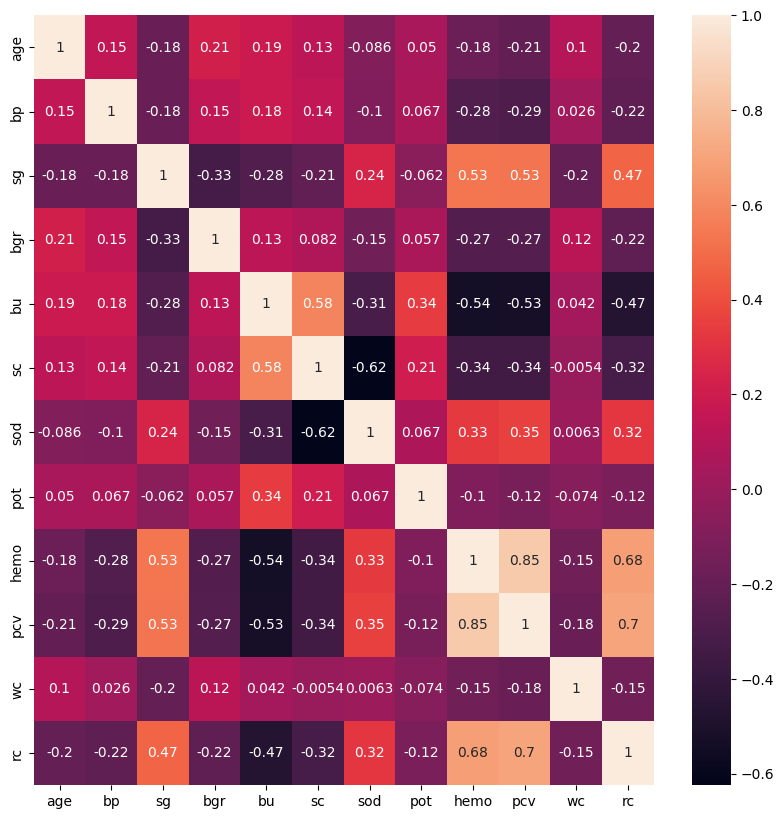

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(df_fill.corr(),annot=True, annot_kws={'size':10})

In [176]:
# 혈액검사 수치에 따른 관계도
blood = ['rbc', 'pc', 'bgr','sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

,rbc,pc,bgr,sod,pot,hemo,pcv,wc,rc
0,NaN,normal,121.0,137.528754,NaN,15.4,44.0,7800.0,5.2
1,NaN,normal,NaN,137.528754,NaN,11.3,38.0,6000.0,NaN
2,normal,normal,423.0,137.528754,NaN,9.6,31.0,7500.0,NaN
3,normal,abnormal,117.0,111.000000,2.5,11.2,32.0,6700.0,3.9
4,normal,normal,106.0,137.528754,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...
395,normal,normal,140.0,150.000000,4.9,15.7,47.0,6700.0,4.9
396,normal,normal,75.0,141.000000,3.5,16.5,54.0,7800.0,6.2
397,normal,normal,100.0,137.000000,4.4,15.8,49.0,6600.0,5.4
398,normal,normal,114.0,135.000000,4.9,14.2,51.0,7200.0,5.9


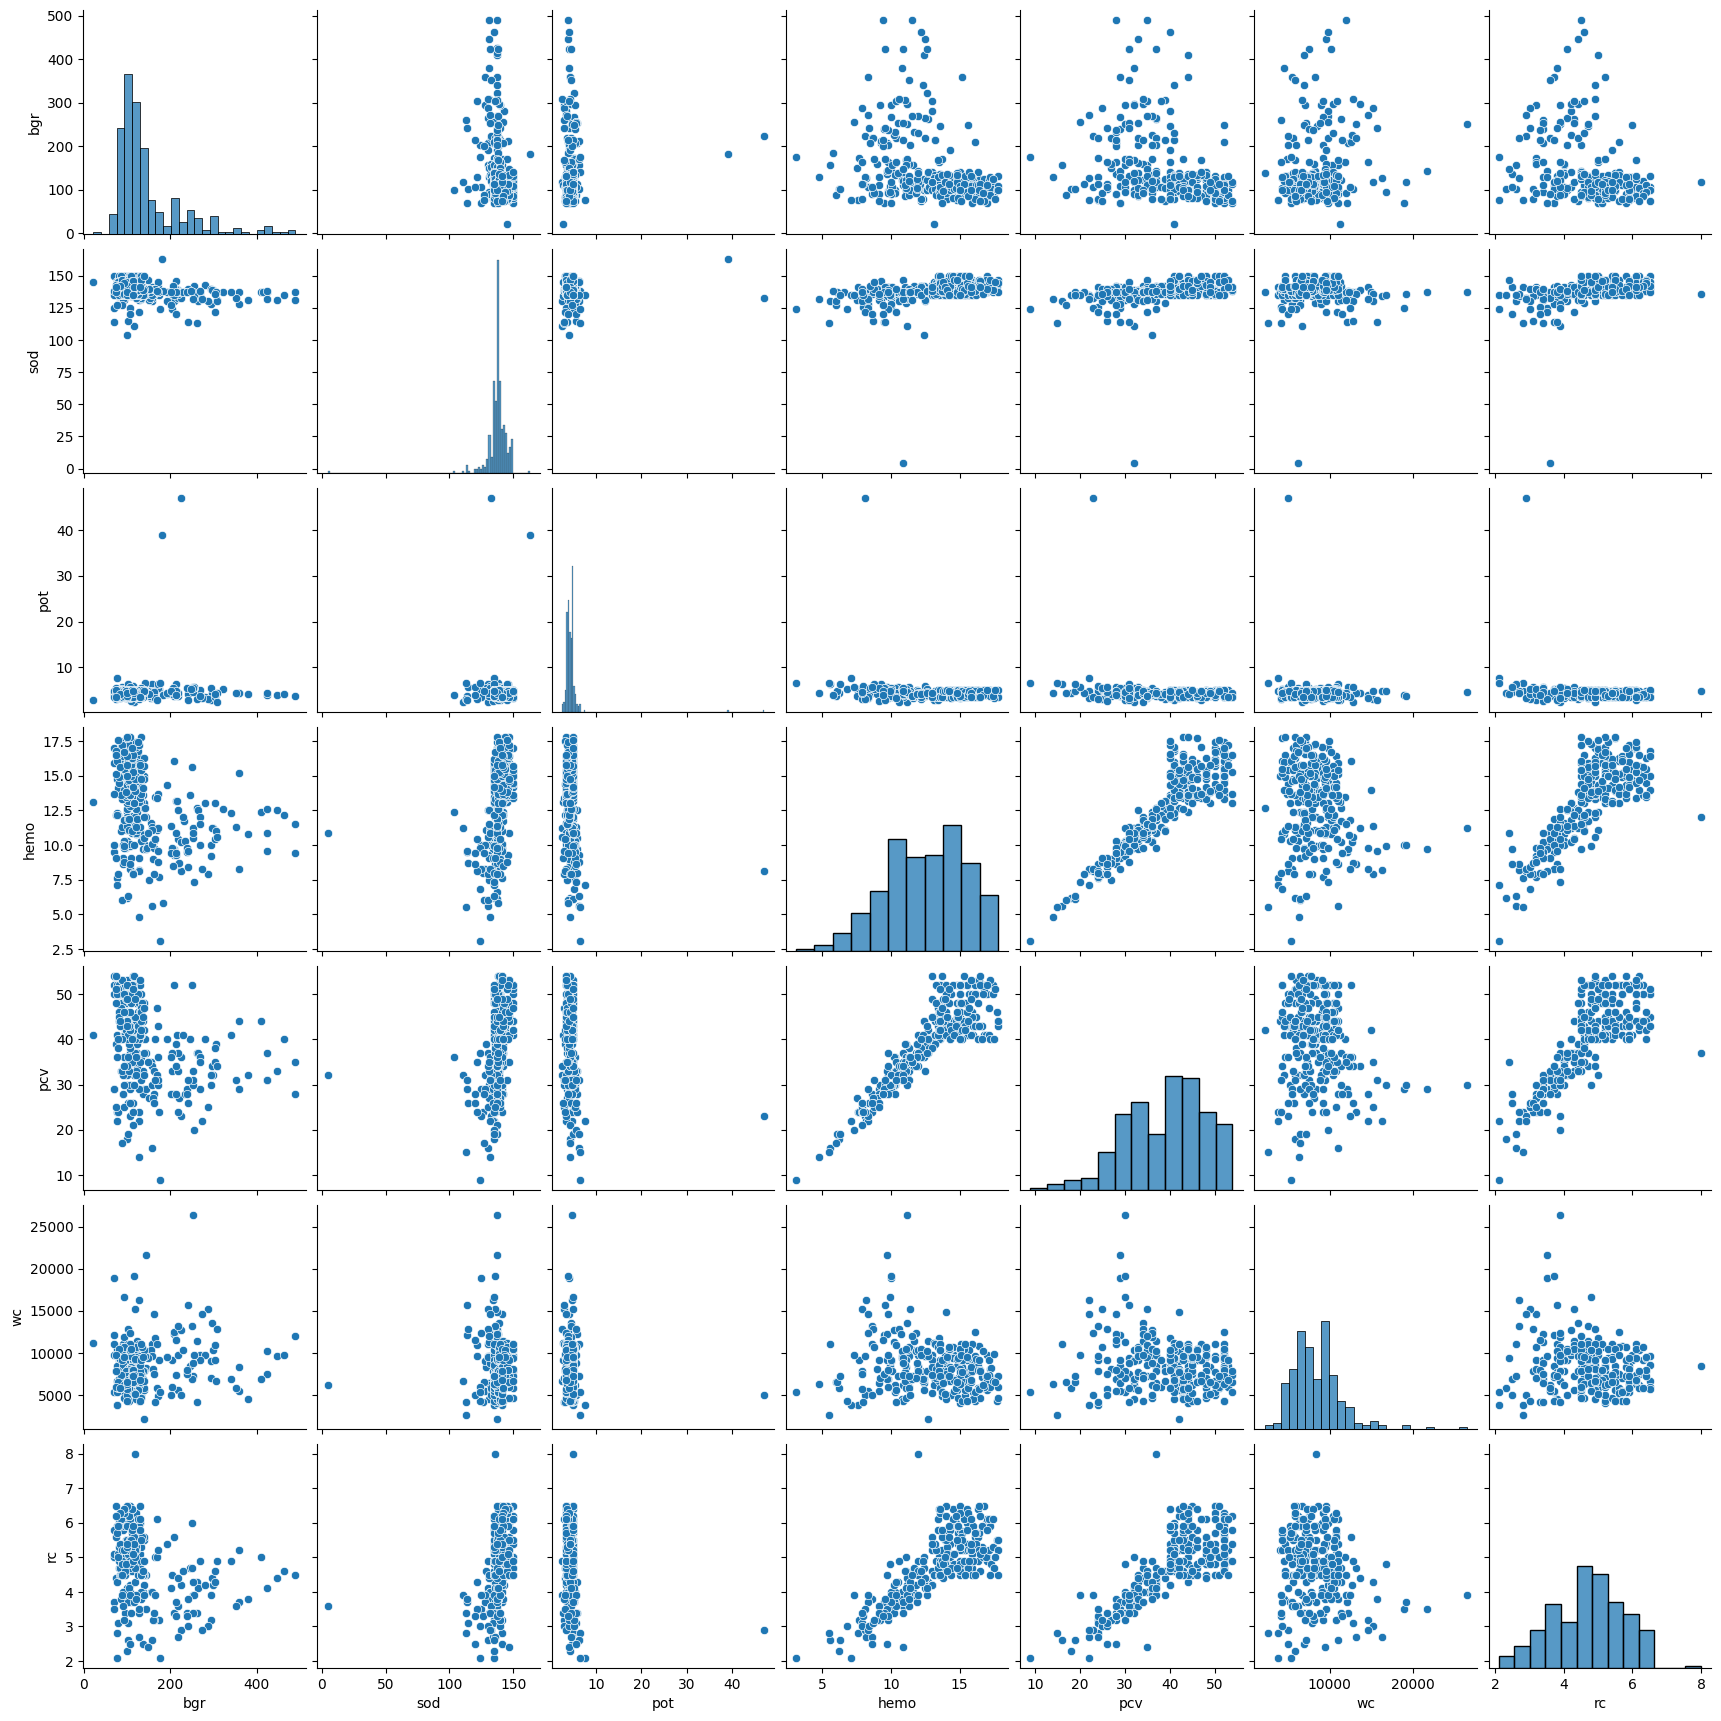

In [177]:
sns.pairplot(df[blood])

In [178]:
# 소변검사에 따른 관계도
urine = ['pcc', 'ba','sg', 'bu', 'sc']

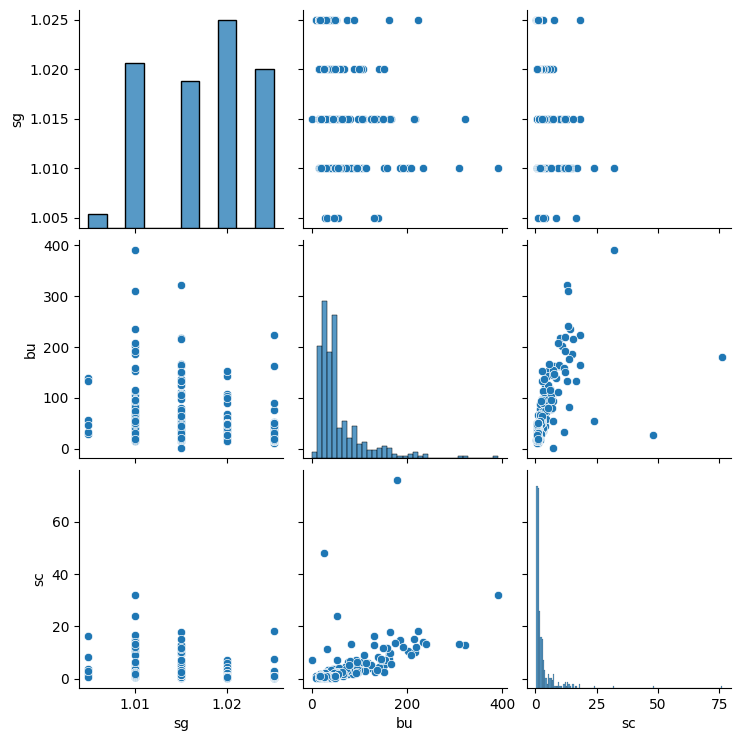

In [179]:
sns.pairplot(df[urine])